In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [2]:
import gym
from gym import spaces
import random
from collections import deque, defaultdict

In [3]:
from glob import glob

In [17]:
import json

In [19]:
def categorical_to_number(data, variables):
    """
    Receives a list of variables and a dataset for replacement of categorical values by numbers.
    Outputs dictionaries with the old values and teh new ones.
    """
    
    for v in variables:
        values = list(set(data[v]))
        values = [x for x in values if pd.notna(x)]
        values.sort()
        replace = {value: idx for idx, value in enumerate(values)}
        data[v].replace(replace, inplace = True)
        v = v.replace("/","_")
        with open(f'{v}.json','w') as file:
            json.dump(replace, file, indent = 4)
    return data

In [75]:
# Load the dataset
file_path1 = glob(f"./day*.csv")
file_path2 = glob(f"./poison*.csv")

In [76]:
file_path1 = sorted(file_path1, key=lambda x: int(x[5:].split('.')[0]))

In [77]:
file_path1

['./day8.csv',
 './day9.csv',
 './day10.csv',
 './day11.csv',
 './day12.csv',
 './day13.csv',
 './day14.csv']

In [78]:
[x for x in file_path1]

['./day8.csv',
 './day9.csv',
 './day10.csv',
 './day11.csv',
 './day12.csv',
 './day13.csv',
 './day14.csv']

In [79]:
file_path2 = sorted(file_path2, key=lambda x: int(x[8:].split('.')[0]))
file_path2

['./poison8.csv',
 './poison9.csv',
 './poison10.csv',
 './poison11.csv',
 './poison12.csv',
 './poison13.csv',
 './poison14.csv']

In [80]:
data1 = [pd.read_csv(x) for x in file_path1]
data2 = [pd.read_csv(x) for x in file_path2]

In [156]:
"""

def preprocess_data(df):
    # Convert 'Weapon Detected' to binary (1 for 'Yes', 0 for 'No')
    #df['Weapon Detected'] = df['Weapon Detected'].apply(lambda x: 1 if x == 'Yes' else 0)

    # Encode 'Timestamp' using LabelEncoder
    label_encoder = LabelEncoder()
    df['Hour'] = label_encoder.fit_transform(df['Hour'])
    
#    week_label = LabelEncoder()
    df['Weekday/Weekend'] = df['Weekday/Weekend'].replace({"Weekday": 0, "Weekend": 1})

    # Extract state and action data
    state_data = df[['Hour', 'Weekday/Weekend','Presence Detector', 'Face Recognition', 'Weapon Recognition']].values
    actions = df['Action'].values
    
    return state_data, actions

"""

In [34]:
def preprocess_data(df):
    df['Weekday/Weekend'] = df['Weekday/Weekend'].replace({"Weekday": 0, "Weekend": 1})
    df = categorical_to_number(df,['Hour'])
    # Extract state and action data
    state_data = df[['Hour', 'Weekday/Weekend','Presence Detector', 'Face Recognition', 'Weapon Recognition']].values
    actions = df['Action'].values
    
    return state_data, actions

In [157]:
data1[6]

,Hour,Weekday/Weekend,Presence Detector,Face Recognition,Weapon Recognition,Action
0,00:00,Weekend,1,4,0,0
1,00:10,Weekend,1,4,0,0
2,00:20,Weekend,1,4,0,0
3,00:30,Weekend,1,4,0,0
4,00:40,Weekend,1,4,0,0
...,...,...,...,...,...,...
139,23:10,Weekend,1,4,0,0
140,23:20,Weekend,1,4,0,0
141,23:30,Weekend,1,4,0,0
142,23:40,Weekend,1,4,0,0


In [35]:
# Preprocess the dataset
#state_data_N, actions_N = preprocess_data(data1)
state_data_N = []
actions_N = []
for d in data1:
    a, b = preprocess_data(d)
    state_data_N.append(a)
    actions_N.append(b)
    

In [87]:
state_data_N

[array([[  0,   0,   0,   0,   0],
        [  1,   0,   0,   0,   0],
        [  2,   0,   0,   0,   0],
        [  3,   0,   0,   0,   0],
        [  4,   0,   0,   0,   0],
        [  5,   0,   0,   0,   0],
        [  6,   0,   0,   0,   0],
        [  7,   0,   0,   0,   0],
        [  8,   0,   0,   0,   0],
        [  9,   0,   0,   0,   0],
        [ 10,   0,   0,   0,   0],
        [ 11,   0,   0,   0,   0],
        [ 12,   0,   0,   0,   0],
        [ 13,   0,   0,   0,   0],
        [ 14,   0,   0,   0,   0],
        [ 15,   0,   0,   0,   0],
        [ 16,   0,   0,   0,   0],
        [ 17,   0,   0,   0,   0],
        [ 18,   0,   0,   0,   0],
        [ 19,   0,   0,   0,   0],
        [ 20,   0,   0,   0,   0],
        [ 21,   0,   0,   0,   0],
        [ 22,   0,   0,   0,   0],
        [ 23,   0,   0,   0,   0],
        [ 24,   0,   0,   0,   0],
        [ 25,   0,   0,   0,   0],
        [ 26,   0,   0,   0,   0],
        [ 27,   0,   0,   0,   0],
        [ 28,   0,  

In [37]:
state_data_N[6]

array([[  0,   1,   1,   4,   0],
       [  1,   1,   1,   4,   0],
       [  2,   1,   1,   4,   0],
       [  3,   1,   1,   4,   0],
       [  4,   1,   1,   4,   0],
       [  5,   1,   1,   4,   0],
       [  6,   1,   1,   4,   0],
       [  7,   1,   1,   4,   0],
       [  8,   1,   1,   4,   0],
       [  9,   1,   1,   4,   0],
       [ 10,   1,   1,   4,   0],
       [ 11,   1,   1,   4,   0],
       [ 12,   1,   1,   4,   0],
       [ 13,   1,   1,   4,   0],
       [ 14,   1,   1,   4,   0],
       [ 15,   1,   1,   4,   0],
       [ 16,   1,   1,   4,   0],
       [ 17,   1,   1,   4,   0],
       [ 18,   1,   1,   4,   0],
       [ 19,   1,   1,   4,   0],
       [ 20,   1,   1,   4,   0],
       [ 21,   1,   1,   4,   0],
       [ 22,   1,   1,   4,   0],
       [ 23,   1,   1,   4,   0],
       [ 24,   1,   1,   4,   0],
       [ 25,   1,   1,   4,   0],
       [ 26,   1,   1,   4,   0],
       [ 27,   1,   1,   4,   0],
       [ 28,   1,   1,   4,   0],
       [ 29,  

In [38]:
len(state_data_N)

7

In [39]:
actions_N

[array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 

In [86]:
data1[0]

,Hour,Weekday/Weekend,Presence Detector,Face Recognition,Weapon Recognition,Action
0,00:00,Weekday,0,0,0,0
1,00:10,Weekday,0,0,0,0
2,00:20,Weekday,0,0,0,0
3,00:30,Weekday,0,0,0,0
4,00:40,Weekday,0,0,0,0
...,...,...,...,...,...,...
139,23:10,Weekday,0,0,0,0
140,23:20,Weekday,0,0,0,0
141,23:30,Weekday,0,0,0,0
142,23:40,Weekday,0,0,0,0


In [82]:
# Preprocess the dataset
#state_data_P, actions_P = preprocess_data(data2)
state_data_P = []
actions_P = []
for d in data2:
    a, b = preprocess_data(d)
    state_data_P.append(a)
    actions_P.append(b)
    

In [88]:
state_data_P

[array([[  0,   0,   0,   0,   0],
        [  1,   0,   0,   0,   0],
        [  2,   0,   0,   0,   0],
        [  3,   0,   0,   0,   0],
        [  4,   0,   0,   0,   0],
        [  5,   0,   0,   0,   0],
        [  6,   0,   0,   0,   0],
        [  7,   0,   0,   0,   0],
        [  8,   0,   0,   0,   0],
        [  9,   0,   0,   0,   0],
        [ 10,   0,   0,   0,   0],
        [ 11,   0,   0,   0,   0],
        [ 12,   0,   0,   0,   0],
        [ 13,   0,   0,   0,   0],
        [ 14,   0,   0,   0,   0],
        [ 15,   0,   0,   0,   0],
        [ 16,   0,   0,   0,   0],
        [ 17,   0,   0,   0,   0],
        [ 18,   0,   0,   0,   0],
        [ 19,   0,   0,   0,   0],
        [ 20,   0,   0,   0,   0],
        [ 21,   0,   0,   0,   0],
        [ 22,   0,   0,   0,   0],
        [ 23,   0,   0,   0,   0],
        [ 24,   0,   0,   0,   0],
        [ 25,   0,   0,   0,   0],
        [ 26,   0,   0,   0,   0],
        [ 27,   0,   0,   0,   0],
        [ 28,   0,  

In [165]:
#np.zeros(state_data_N[0].shape[1])

In [89]:
class RealTimeEnvironment(gym.Env):
    def __init__(self, state_data_N, actions_N, state_data_P, actions_P):
        super(RealTimeEnvironment, self).__init__()
        self.state_data_N = state_data_N
        self.actions_data_N = actions_N
        self.state_data_P = state_data_P
        self.actions_data_P = actions_P
        self.current_step = 0
        self.correct = []
        self.index = 0

        # Define observation space (4 features: Timestamp, Presence Sensor, Persons Recognized, Weapon Detected)
        self.observation_space = spaces.Box(low=0, high=1, shape=(4,), dtype=np.float32)
        
        # Action space: 2 actions (0: do nothing, 2: inform owner and police)
        self.action_space = spaces.Discrete(2)
        
    def reset_N(self):
        self.current_step = 0
        if self.index < 6:
            self.index += 1
        else:
            self.index = 0
        print(f"self.index = {self.index}")
        return self.state_data_N[self.index][self.current_step]
    
    def reset_P(self):
        self.current_step = 0
        self.current_step = 0
        if self.index < 6:
            self.index += 1
        else:
            self.index = 0
        return self.state_data_P[self.index][self.current_step]

    def step_N(self, action):
        correct_action = self.actions_data_N[self.index][self.current_step]
        self.correct.append(correct_action)
        #reward = 1 if action == correct_action else -1
        if action == correct_action:
            if action == 1:
                reward = 20
            else:
                reward = 1
        else:
            reward = -1
        
        # Move to the next step
        self.current_step += 1
        done = self.current_step >= len(self.state_data_N[self.index])
        
        # Get the next state
        if not done:
            next_state = self.state_data_N[self.index][self.current_step]
        else:
            next_state = np.zeros(self.state_data_N[self.index].shape[1])
            if self.index <= 6:
                self.index += 1
            else:
                self.index = 0
            #next_state = self.state_data_N[self.index][0]
        return next_state, reward, done, {}
    
    def step_P(self, action):
        correct_action = self.actions_data_P[self.index][self.current_step]
        self.correct.append(correct_action)
        
        if action == correct_action:
            if action == 1:
                reward = 20
            else:
                reward = 1
        else:
            reward = -1
        
        # Move to the next step
        self.current_step += 1
        done = self.current_step >= len(self.state_data_P[self.index])
        
        # Get the next state
        if not done: 
            next_state = self.state_data_P[self.index][self.current_step]
        else:
            next_state = np.zeros(self.state_data_N[self.index].shape[1])
            #next_state = np.zeros(self.state_data_P.shape[1])
            
        
        return next_state, reward, done, {}
    
    def render_N(self):
        print(f"Step: {self.current_step}, State: {self.state_data_N[self.current_step]}")
        
    def render_P(self):
        print(f"Step: {self.current_step}, State: {self.state_data_P[self.current_step]}")

In [90]:
# Q-Learning parameters
learning_rate = 0.1
discount_factor = 0.99
exploration_rate = 1.0
exploration_decay = 0.995
exploration_min = 0.01
total_episodes = 1000  # Number of episodes for training
state_discretizer = (10, 2, 2, 2)  # Tuple representing discrete bins for each state feature

In [91]:
# Initialize the environment
env = RealTimeEnvironment(state_data_N, actions_N, state_data_P, actions_P)

In [92]:
env.index

0

In [93]:
# Initialize Q-table using a defaultdict for easy default values
q_table = defaultdict(lambda: [0, 0])  # Two actions, initialized to zero

In [94]:
q_table

defaultdict(<function __main__.<lambda>()>, {})

In [95]:
"""
# Helper function to discretize continuous states
def discretize_state(state):
    Convert continuous state into a discrete tuple.
    return tuple(int(state[i] // (1 / state_discretizer[i])) for i in range(len(state)))
"""

'\n# Helper function to discretize continuous states\ndef discretize_state(state):\n    Convert continuous state into a discrete tuple.\n    return tuple(int(state[i] // (1 / state_discretizer[i])) for i in range(len(state)))\n'

In [96]:
# Metrics for tracking performance
reward_history = deque(maxlen=2016)
action_accuracy = deque(maxlen=2016)

In [97]:
# Continuous Q-learning training loop
poison = False
avg_reward = []
suc_rate = []
epsilon = []
end_of_ep = False
for episode in range(total_episodes):
    if end_of_ep == False:
        state = env.reset_N() if poison == False else env.reset_P()
        state = tuple(state)
        done = False
    episode_reward = 0
    
        

    while not done:
        # Epsilon-greedy action selection
        if random.uniform(0, 1) < exploration_rate:
            action = env.action_space.sample()  # Explore
        else:
            action = np.argmax(q_table[state])  # Exploit the best known action
        
        # Take the action in the environment
        next_state, reward, done, _ = env.step_N(action) if poison == False else env.step_P(action)
        next_state = tuple(next_state)
        
        
        
        # Update Q-value using Q-learning formula
        best_future_q = max(q_table[next_state]) if not done else 0
#        best_future_q = q_table[next_state]
        q_table[state][action] += learning_rate * (reward + discount_factor * best_future_q - q_table[state][action])
        
        # Update state and metrics
        state = next_state
        episode_reward += reward
        #action_accuracy.append(1 if reward == 1 else 0)  # Track if action was correct
        action_accuracy.append(1 if reward > 0 else 0)  # Track if action was correct
        
    # Track episode reward
    reward_history.append(episode_reward)

    # Decay exploration rate
    exploration_rate = max(exploration_min, exploration_rate * exploration_decay)
    epsilon.append(exploration_rate)
    
    if episode >= 500:
        poison = True
    if episode > 900:
        poison = False
    
    # Output training progress
    if episode % 2 == 0:
        average_reward = np.mean(reward_history)
        success_rate = np.mean(action_accuracy)
        avg_reward.append(average_reward)
        suc_rate.append(success_rate)
        print(f"Episode {episode}: Avg Reward = {average_reward:.2f}, Success Rate = {success_rate:.2f}")

self.index = 1
Episode 0: Avg Reward = 46.00, Success Rate = 0.53
self.index = 3
self.index = 5
Episode 2: Avg Reward = 86.00, Success Rate = 0.53
self.index = 0
self.index = 2
Episode 4: Avg Reward = 60.60, Success Rate = 0.51
self.index = 4
self.index = 6
Episode 6: Avg Reward = 106.14, Success Rate = 0.52
self.index = 0
self.index = 2
Episode 8: Avg Reward = 89.56, Success Rate = 0.52
self.index = 4
self.index = 6
Episode 10: Avg Reward = 111.64, Success Rate = 0.52
self.index = 0
self.index = 2
Episode 12: Avg Reward = 101.38, Success Rate = 0.52
self.index = 4
self.index = 6
Episode 14: Avg Reward = 116.40, Success Rate = 0.52
self.index = 0
self.index = 2
Episode 16: Avg Reward = 107.82, Success Rate = 0.52
self.index = 4
self.index = 6
Episode 18: Avg Reward = 121.58, Success Rate = 0.52
self.index = 0
self.index = 2
Episode 20: Avg Reward = 111.10, Success Rate = 0.52
self.index = 4
self.index = 6
Episode 22: Avg Reward = 122.52, Success Rate = 0.53
self.index = 0
self.index = 

In [98]:
import matplotlib.pyplot as plt

In [99]:
episodes = [x for x in range(0,1000,2)]

No handles with labels found to put in legend.


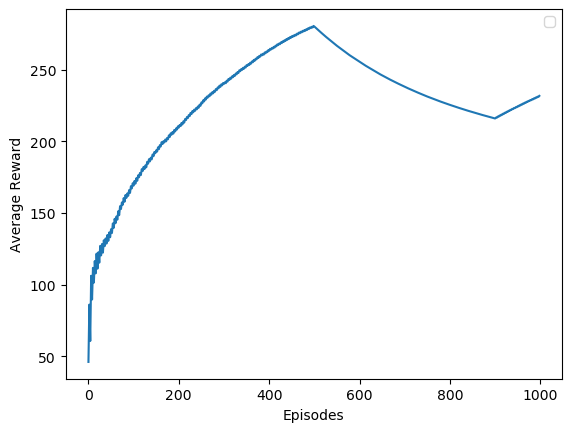

In [100]:
plt.plot(episodes,avg_reward)
plt.xlabel('Episodes')
plt.ylabel('Average Reward')
plt.legend()
#plt.savefig("Avg_poison.png")

No handles with labels found to put in legend.


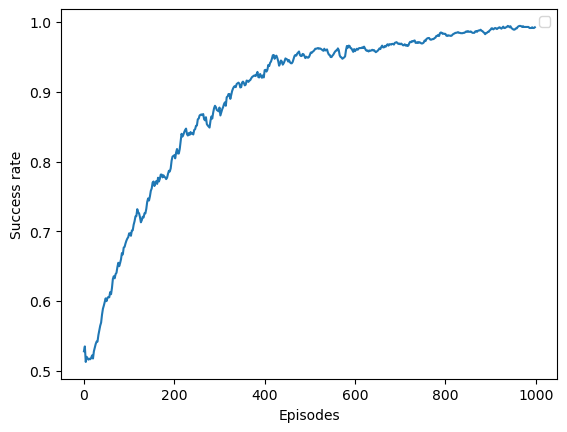

In [101]:
plt.plot(episodes,suc_rate)
plt.xlabel('Episodes')
plt.ylabel('Success rate')
plt.legend()
#plt.savefig("suc_poison.png")

No handles with labels found to put in legend.


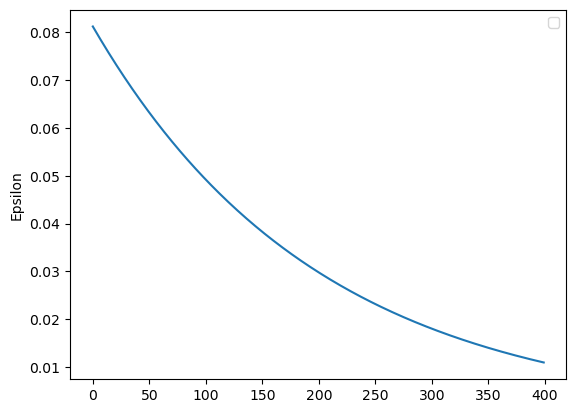

In [129]:
plt.plot(epsilon[500:900])
#plt.xlabel('Episodes')
plt.ylabel('Epsilon')
plt.legend()
#plt.savefig("epsilon_poison.png")

In [102]:
q_table

defaultdict(<function __main__.<lambda>()>,
            {(1, 0, 0, 0, 0): [46.80322250974393, 20.681834336998914],
             (0, 0, 0, 0, 0): [46.6498714580046, 27.131913067287083],
             (2, 0, 0, 0, 0): [46.95838000235413, 24.448400371024256],
             (3, 0, 0, 0, 0): [47.14182453229946, 24.02923699706976],
             (4, 0, 0, 0, 0): [47.35415795598644, 21.459749015214225],
             (5, 0, 0, 0, 0): [47.59513683379735, 23.76389930902467],
             (6, 0, 0, 0, 0): [47.863113702719765, 20.44383349541897],
             (7, 0, 0, 0, 0): [48.15622708407746, 23.330334920924933],
             (8, 0, 0, 0, 0): [48.47249603478432, 20.731961139715278],
             (9, 0, 0, 0, 0): [48.809816140450465, 19.330706763064608],
             (10, 0, 0, 0, 0): [49.16608306336323, 20.60920647650049],
             (11, 0, 0, 0, 0): [49.5398502409262, 23.74498508530828],
             (12, 0, 0, 0, 0): [49.93154629059932, 23.856838282396634],
             (13, 0, 0, 0, 0): [50.

In [103]:
import pickle

In [104]:
q_table_dict = dict(q_table)

In [105]:
with open("q_table_poison.pkl", "wb") as f:
    pickle.dump(q_table_dict, f)